# Road Lane Line Detection with OpenCV

(172, 293, 3)


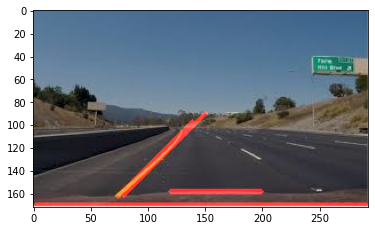

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def region_of_intrest(img,vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_the_lines(img,lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),np.uint8)
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,0,0),thickness=4)
    img = cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img
    
    
    
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_intrest_vertices = [
    (0,height),
    (width/2,height/2),
    (width,height)
]
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image,100,200)
croped_image = region_of_intrest(canny_image,
                                 np.array([region_of_intrest_vertices],np.int32))

lines = cv2.HoughLinesP(croped_image,
                       rho=6,
                       theta = np.pi/60,
                       threshold = 160,
                       lines = np.array([]),
                       minLineLength = 40,
                       maxLineGap = 25)
image_with_lines=draw_the_lines(image,lines)


plt.imshow(image_with_lines)
plt.show()

# Circle Detection using OpenCV Hough Circle Transform 

In [22]:
import numpy as np
import cv2
img = cv2.imread('smarties.png')
output = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,
                param1=50,param2=30,minRadius=0,maxRadius=0)
detectde_circles = np.uint16(np.around(circles))
for (x,y,r) in detectde_circles[0,:]:
    cv2.circle(output,(x,y),r,(255,0,0),3)
    cv2.circle(output,(x,y),2,(255,0,0),3)
    
cv2.imshow('output',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import numpy as np
import cv2
img = cv2.imread('shapes.jfif')
output = img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,
                param1=50,param2=30,minRadius=0,maxRadius=0)
detectde_circles = np.uint16(np.around(circles))
for (x,y,r) in detectde_circles[0,:]:
    cv2.circle(output,(x,y),r,(255,0,0),3)
    cv2.circle(output,(x,y),2,(255,0,0),3)
    
cv2.imshow('output',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Face Detection using Haar Cascade Classifiers

#  Detect Corners with Harris Corner Detector in OpenCV

In [2]:
import numpy as np
import cv2 as cv

img = cv.imread('chessboard.png')
cv.imshow('img',img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

dst == cv.dilate(dst,None)

img[dst > 0.01 * dst.max()] = [0,0,255]

cv.imshow('dst',img)
if cv.waitKey(0) & 0xff==27:
    cv.destroyAllWindows()

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('pic1.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
    
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff==27:
    cv.destroyAllWindows()

# How to Use Background Subtraction Methods in OpenCV 

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('vtest.avi')
fgbg = cv.bgsegm.createBackgroundSubtractorMOG2()
while True:
    ret,frame = cap.read()
    if frame is None:
        break
        
    fgmask = fgbg.apply(frame)
        
    cv.imshow('Frame',frame)
    cv.imshow('fg mask frame',fgmask)
    keyboard = cv.waitKey(30)
    if keyboard=='q' or keyboard==27:
        break
cap.release()
cv.destroyAllWindows()